# Assignment report template for ITNPBD2
This Jupyter Notebook file contains each of the tasks that you need to attempt for the Assignment in ITNPBD2.

You should have already read the instructions on the Canvas page https://canvas.stir.ac.uk/courses/11055/assignments/80892  
If not __please do so before continuing__

Read each question/task carefully before providing your answer and solution.

# 1) Crossing a road at an angle?
Look at the attached picture. If you were walking from point A to point B that is L meters further down the street, it is obviously shorter to walk in a straight line between the two points (Blue line), rather than crossing the road first (via the crosswalk) and then walking alongside the road for L meters (Red lines)

Your task is to write a script that accomplishes the following:
 1. Calculates the distance that you save by crossing at an angle for any given distance L
 2. Calculates the additional distance travelled on the road by crossing at an angle.
 3. Demonstrates on a graph the upper bound of the distance saved by increasing L
 4. Finds the length L, within 2 decimal points, where the distance saved no longer exceeds the additional distance travelled on the road. That is, the length L when you risk more than you gain.
 5. Demonstrates point 4 on a graph 

You should assume that both sides of the road are straight lines, they are infinitely long, and that they are parallel.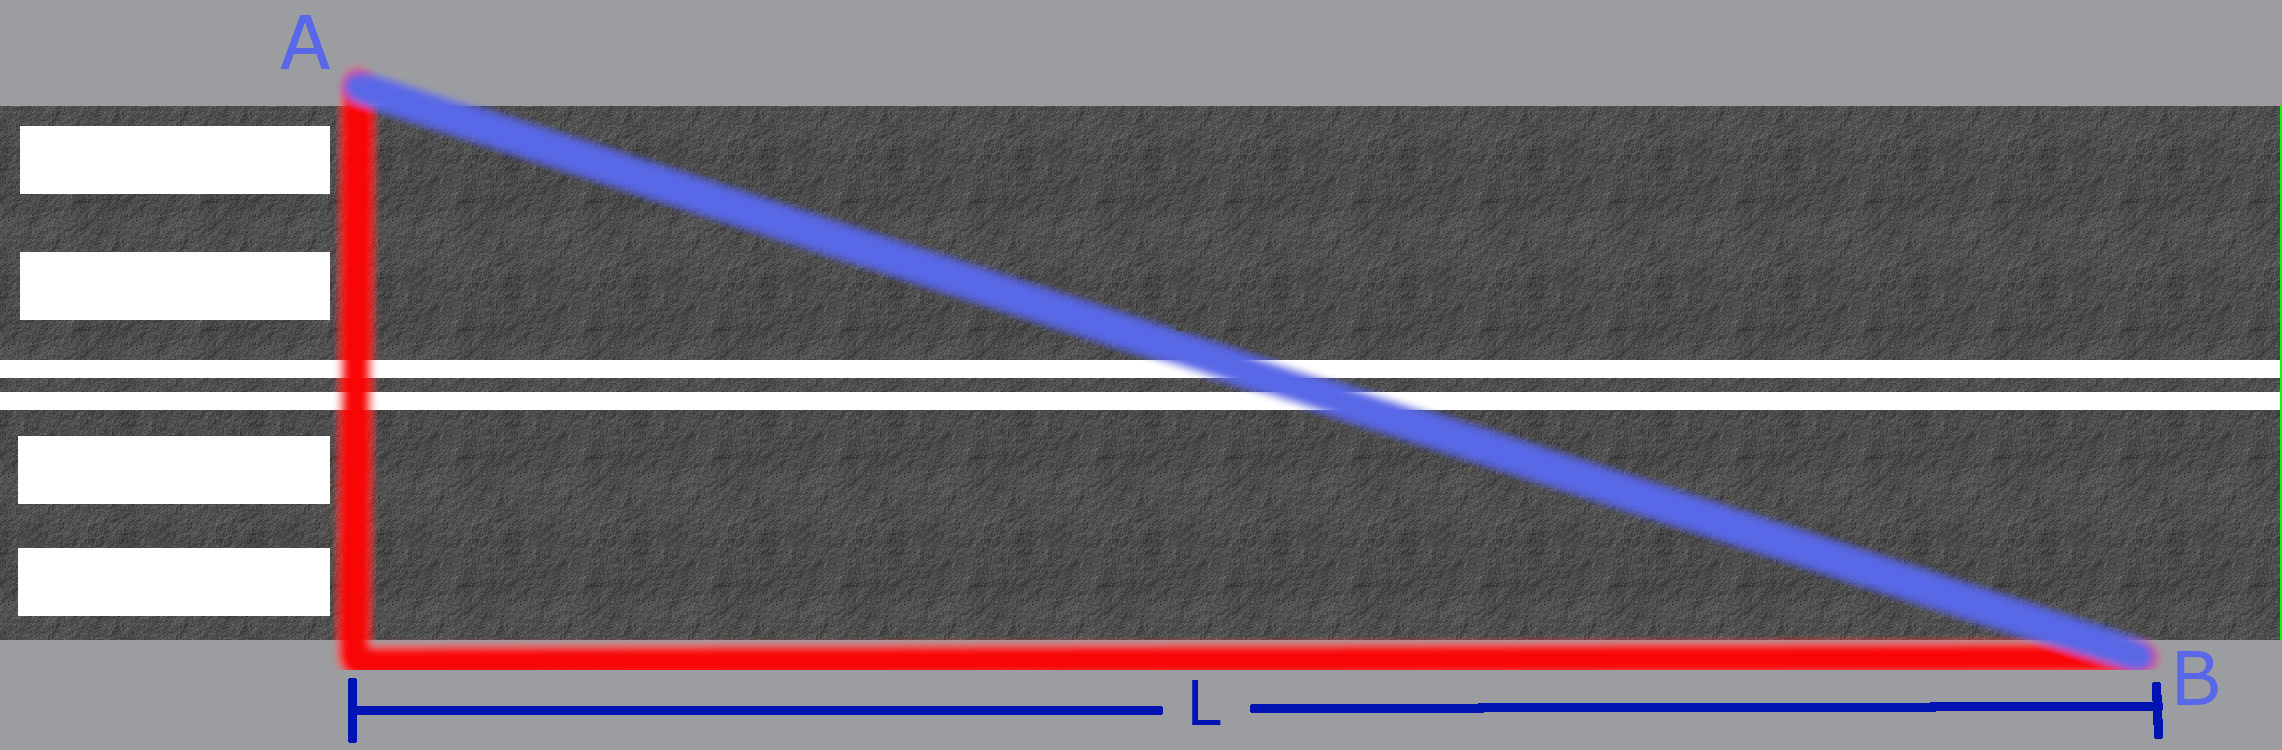

In [39]:
# importing math library
import math
#cross_distance variable creation
cross_distance = float(input("Provide cross distance: "))
# hyp variable
hyp= float(input("Enter hypotenuse distance: "))
#difference variable
difference = math.sqrt(cross_distance ** 2 + hyp ** 2)
#printing the difference
print(f"The length of the 'difference' at an angle is {difference}")

Provide cross distance: 11
Enter hypotenuse distance: 4
The length of the 'difference' at an angle is 11.704699910719626


# 2) Fetch the data
Use requests _get_ to load the data from http://cs.stir.ac.uk/~soh/BD2spring2022/assignmentdata.php into an XML tree, then:
- extract the root element as separate variable, and display the root tag. 
- extract the two children of the root element into another two separate variables, and display their tags as well.

You will need to provide a single parameter to the get request, it has been provided in the code cell below for your convenience, as has the url.

Use Python to accomplish every step of this, i.e. __do not__ manually save the data into a file and then read the file with open() or something equivalent.

Name the tree variable *tree*, the root element *root*, and the children elements *tweets_branch* and *cities_branch*


In [40]:
#importing xml.etree.ElementTree
import xml.etree.ElementTree as ET
#importing request
import requests
#url source
url = "http://cs.stir.ac.uk/~soh/BD2spring2022/assignmentdata.php"
params = {'data':'sputvws'}


In [41]:
## get data
c = requests.get (url, params)
tree = c.content

In [42]:
## root element extraction and root tag display
root = ET.fromstring(tree)
print(root.tag)

twitter_data


In [43]:
root_attr = root.attrib
#printing 
print(root_attr)

{}


# 3) Separate the two branches into two lists of dictionaries
Create two variables __cities__ and __tweets__ that contain each main branch of the XML tree as lists of dictionaries.  
Make sure that the data values are of appropriate types.  
Print out the field names and values (keys and values) of one city and one tweet.

*hint: latitude and longitude might be best kept as strings*  

In [44]:
# importing BeautifulSoup
from bs4 import BeautifulSoup

In [45]:
#creating box variable
box= BeautifulSoup(requests.get(url, params=params).content, "xml")

In [46]:
tweets = []
# for loop
for t in box.select("tweets > tweet"):
    tweets.append({"id": t["id"], **{x.name: x.text for x in t.find_all()}})
#printing data in tweets 
print(tweets)

[{'id': '16620625 5686', 'Name': 'Kenyon Conley', 'Phone': '0327 103 9485', 'Email': 'malesuada@lobortisClassaptent.edu', 'Location': '45.5333, -73.2833', 'GenderID': 'male', 'Tweet': "#FollowFriday @DanielleMorrill - She's with @Seattle20 and @Twilio. Also fun to talk to.  #entrepreneur", 'City': 'Saint-Basile-le-Grand', 'Country': 'Canada', 'Age': '34'}, {'id': '16310427-5502', 'Name': 'Griffin Norton', 'Phone': '0306 178 7917', 'Email': 'in.dolor.Fusce@necmalesuadaut.ca', 'Location': '52.0000, 84.9833', 'GenderID': 'male', 'Tweet': "!!!Veryy Bored!!!  ~~Craving Million's Of MilkShakes~~", 'City': 'Belokurikha', 'Country': 'Russia', 'Age': '33'}, {'id': '16501010 4957', 'Name': 'Benjamin Haley', 'Phone': '(019348) 22077', 'Email': 'posuere@hymenaeos.edu', 'Location': '-14.4667, 132.2667', 'GenderID': 'male', 'Tweet': "i knew this would happen !! i'd start feeling really ill and wouldn't be able to sleep. it's exactly the same as what happened friday &gt;:|", 'City': 'Katherine', 'Cou

In [26]:
#cities variable creation
cities = []
#for loop
for c in box.select("cities > city"):
    cities.append({"id": c["id"], **{x.name: x.text for x in c.find_all()}})
#printing cities data 
print(cities)

[{'id': '1036323110', 'city': 'Katherine', 'city_ascii': 'Katherine', 'lat': '-14.4667', 'lng': '132.2667', 'country': 'Australia', 'iso2': 'AU', 'iso3': 'AUS', 'capital': '', 'population': '1488'}, {'id': '1840015979', 'city': 'South Pasadena', 'city_ascii': 'South Pasadena', 'lat': '27.7526', 'lng': '-82.7394', 'country': 'United States', 'iso2': 'US', 'iso3': 'USA', 'capital': '', 'population': '5095'}, {'id': '1124755118', 'city': 'Beaconsfield', 'city_ascii': 'Beaconsfield', 'lat': '45.4333', 'lng': '-73.8667', 'country': 'Canada', 'iso2': 'CA', 'iso3': 'CAN', 'capital': '', 'population': '19115'}, {'id': '1250921305', 'city': 'Ferney-Voltaire', 'city_ascii': 'Ferney-Voltaire', 'lat': '46.2558', 'lng': '6.1081', 'country': 'France', 'iso2': 'FR', 'iso3': 'FRA', 'capital': '', 'population': '9766'}, {'id': '1156346497', 'city': 'Jiangshan', 'city_ascii': 'Jiangshan', 'lat': '28.7412', 'lng': '118.6225', 'country': 'China', 'iso2': 'CN', 'iso3': 'CHN', 'capital': '', 'population': '

# 4) How many unique City - Country pairs exist in the data?
Find out how many different locations are represented in the twitter data with City and Country pairs.  
Does the tweet data contain more, less, or equal number of pairs?

- Print out the 10 most populated cities (largest)
- Print out the __number__ of unique pairs and show that they match the number of cities in the cities branch.

You can either use ElementTree methods on the XML tree itself or work with the list of dictionaries variables in addition to any looping and built-in functionality you see fit.  


In [47]:
#rare_cities varaible creation
rare_cities = set( val for dic in cities for val in dic.values())
#printing rare cities
print("Rare cities: ",rare_cities)

Rare cities:  {'', '1488', 'Roskovec', 'ALB', 'UKR', 'Coburg', '1826548197', '-73.8667', 'Czechia', '-122.6292', 'Dīla', 'TZ', 'PER', 'Hampstead', '1840070391', 'JPN', 'Zhovti Vody', '36.9900', 'Tonantins', '38.8759', '-7.7296', '50.7762', '-2.5658', '-47.1542', 'Mníšek pod Brdy', 'Germany', '1840034032', '40.5834', '-86.8015', '44.7667', 'AU', '1840002481', '46.6236', 'LY', 'Indonesia', 'Belokurikha', 'United States', '0.9000', 'Belorechensk', '48.3500', '45.5333', 'Brazil', 'Kibiti', 'Fultondale', '4561', 'Japan', 'Beaconsfield', '1192391794', '137.6167', '1124000968', '25.8833', 'West Islip', '91889', '19.7022', '6.1081', '-74.1496', 'Albania', 'Bedford', '1840005111', 'FRA', '1604957373', '-75.3400', '6657', 'US', '45.4333', '16.5458', 'DEU', '1156346497', '21.1072', 'ETH', 'Paulinia', '6.4104', 'Ethiopia', '1643613232', '48275', '1156104573', '28517', 'Minster', '1840003396', '5976', '-82.7394', '40.7375', '1231393325', 'Singkawang', '38.9500', '-72.6145', 'Aachen', '1643229263', 

# 5) Extract the data into Pandas Dataframes
Create __2__ Pandas Dataframes from the list of dictionaries and make sure you use appropriate data types for each column  
There are missing values in the data and make sure they are represented in the Dataframe with *NaN*  

Call the Dataframes variable __raw_tweet_data__ and __cities_data__

Include the ID of each person as a column and display the first 5 rows of the dataframe

*hint: each person's id is the id attribute of the corresponding xml tag*  

In [48]:
#importing pandas 
import pandas as pd
#cities_data varaible creation
cities_data = pd.DataFrame(cities)
cities_data.head()

,id,city,city_ascii,lat,lng,country,iso2,iso3,capital,population
0,1036323110,Katherine,Katherine,-14.4667,132.2667,Australia,AU,AUS,,1488
1,1840015979,South Pasadena,South Pasadena,27.7526,-82.7394,United States,US,USA,,5095
2,1124755118,Beaconsfield,Beaconsfield,45.4333,-73.8667,Canada,CA,CAN,,19115
3,1250921305,Ferney-Voltaire,Ferney-Voltaire,46.2558,6.1081,France,FR,FRA,,9766
4,1156346497,Jiangshan,Jiangshan,28.7412,118.6225,China,CN,CHN,,467862


In [49]:
cities_data.set_index('id', inplace=True)
cities_data.head()

,city,city_ascii,lat,lng,country,iso2,iso3,capital,population
id,,,,,,,,,
1036323110,Katherine,Katherine,-14.4667,132.2667,Australia,AU,AUS,,1488
1840015979,South Pasadena,South Pasadena,27.7526,-82.7394,United States,US,USA,,5095
1124755118,Beaconsfield,Beaconsfield,45.4333,-73.8667,Canada,CA,CAN,,19115
1250921305,Ferney-Voltaire,Ferney-Voltaire,46.2558,6.1081,France,FR,FRA,,9766
1156346497,Jiangshan,Jiangshan,28.7412,118.6225,China,CN,CHN,,467862


In [50]:
#raw_tweet_data varaible creation
raw_tweet_data = pd.DataFrame(tweets)
raw_tweet_data.head()

,id,Name,Phone,Email,Location,GenderID,Tweet,City,Country,Age
0,16620625 5686,Kenyon Conley,0327 103 9485,malesuada@lobortisClassaptent.edu,"45.5333, -73.2833",male,#FollowFriday @DanielleMorrill - She's with @S...,Saint-Basile-le-Grand,Canada,34
1,16310427-5502,Griffin Norton,0306 178 7917,in.dolor.Fusce@necmalesuadaut.ca,"52.0000, 84.9833",male,!!!Veryy Bored!!! ~~Craving Million's Of Milk...,Belokurikha,Russia,33
2,16501010 4957,Benjamin Haley,(019348) 22077,posuere@hymenaeos.edu,"-14.4667, 132.2667",male,i knew this would happen !! i'd start feeling ...,Katherine,Australia,62
3,16110430 8679,Thaddeus Ashley,0845 46 42,penatibus.et@Donecfeugiatmetus.net,"40.5626, -74.5743",male,#bgt I like Julian smith as well his music is ...,Finderne,United States,49
4,16990624/4174,Ian Ramos,0800 816 7844,pede.nonummy@Vestibulumut.edu,"27.7526, -82.7394",male,will be online in a lil' bit,South Pasadena,United States,26


In [51]:
raw_tweet_data['id'] = raw_tweet_data['id'] .replace(regex=r'^(\d{8})\D(\d{4})$', value=r'\1-\2')
raw_tweet_data.head()

,id,Name,Phone,Email,Location,GenderID,Tweet,City,Country,Age
0,16620625-5686,Kenyon Conley,0327 103 9485,malesuada@lobortisClassaptent.edu,"45.5333, -73.2833",male,#FollowFriday @DanielleMorrill - She's with @S...,Saint-Basile-le-Grand,Canada,34
1,16310427-5502,Griffin Norton,0306 178 7917,in.dolor.Fusce@necmalesuadaut.ca,"52.0000, 84.9833",male,!!!Veryy Bored!!! ~~Craving Million's Of Milk...,Belokurikha,Russia,33
2,16501010-4957,Benjamin Haley,(019348) 22077,posuere@hymenaeos.edu,"-14.4667, 132.2667",male,i knew this would happen !! i'd start feeling ...,Katherine,Australia,62
3,16110430-8679,Thaddeus Ashley,0845 46 42,penatibus.et@Donecfeugiatmetus.net,"40.5626, -74.5743",male,#bgt I like Julian smith as well his music is ...,Finderne,United States,49
4,16990624-4174,Ian Ramos,0800 816 7844,pede.nonummy@Vestibulumut.edu,"27.7526, -82.7394",male,will be online in a lil' bit,South Pasadena,United States,26


In [52]:
raw_tweet_data.set_index('id', inplace=True)
raw_tweet_data.head()


,Name,Phone,Email,Location,GenderID,Tweet,City,Country,Age
id,,,,,,,,,
16620625-5686,Kenyon Conley,0327 103 9485,malesuada@lobortisClassaptent.edu,"45.5333, -73.2833",male,#FollowFriday @DanielleMorrill - She's with @S...,Saint-Basile-le-Grand,Canada,34
16310427-5502,Griffin Norton,0306 178 7917,in.dolor.Fusce@necmalesuadaut.ca,"52.0000, 84.9833",male,!!!Veryy Bored!!! ~~Craving Million's Of Milk...,Belokurikha,Russia,33
16501010-4957,Benjamin Haley,(019348) 22077,posuere@hymenaeos.edu,"-14.4667, 132.2667",male,i knew this would happen !! i'd start feeling ...,Katherine,Australia,62
16110430-8679,Thaddeus Ashley,0845 46 42,penatibus.et@Donecfeugiatmetus.net,"40.5626, -74.5743",male,#bgt I like Julian smith as well his music is ...,Finderne,United States,49
16990624-4174,Ian Ramos,0800 816 7844,pede.nonummy@Vestibulumut.edu,"27.7526, -82.7394",male,will be online in a lil' bit,South Pasadena,United States,26


In [53]:
#rows and column variable creation
rows = len(raw_tweet_data.axes[0])
columns = len(raw_tweet_data.axes[1])
#printing rows and columns
print(rows, columns)

1400 9


# 6) Clean the twitter data
Find the missing values and replace, remove, and standardise as appropriate
- ID should be standardised to XXXXXXXX-XXXX (i.e. 8 and 4 digits separated by a dash), make the ID the index of the dataframe
- Records with missing tweets, age, name, city, or location should result in a removal of the data point
- Phone numbers should be strings but only contain digits, no other characters or whitespaces and missing phone numbers should be replaced with the string '000'
- Missing country should be replaced with the country that corresponds to the city if possible.
 * I.e. find another data point with the same city and copy the country, if there is no other record with the same city then remove.
 * __This does not need to be completed programmatically__, that is, you can use one cell to supply the information and then another cell to fix it with direct assignment statements. Full marks will be given for this approach if the intensions are clear and the code is well formed and documented.

Store the resulting cleaned dataframe in __cleaned_tweet_data__  
__Print the total number of records and the number of rows with missing values before and after cleaning__

In [34]:
data = data.isna()
data = data.dropna()

NameError: name 'data' is not defined

# 7) Validating
Use the data from __cities_data__ to check if there are any mismatches in the data.
- Are there latitudes and longitudes that don't match the City name?
- Are there any cities that are "located" in the wrong country?

Correct where possible, remove otherwise.  
Assume the cities data is accurate and use the "city" columns to match names

Correct the __cleaned_tweet_data__ in place and __print, display or comment on how many mismatches you found__

This does not have to be done programmatically in a single comprehensive search-and-fix code. You can use 1 or more cells and "hard code" the search and the fixes with incremental steps.  
For example, the first cell prints out info of mismatches, what and where they are and the next cell uses that info to fix the mismatches. 

In [35]:
print("cleaned_tweet_data")

cleaned_tweet_data


# 8) Grouping by country and city
Find out 
- the mean, median, and standard deviation of the age for each country.
- Answer the following:
 - What country has the most tweeters?
 - What __city__ has the most tweeters per capita?
 
The cities data contains information about population

In [36]:
data["tweeters"].mean
data["city"].mean

NameError: name 'data' is not defined

# 9) Plot the age distribution by country
Create a figure that contains the distribution of age per country as box plots.  
For each box, visually show the mean and the confidence interval of the median in the figure, preferably using arguments of the plot function.

In [ ]:
matplotlib as plt

In [ ]:
data.hist(10,10)

# 10) Freestyle
Your answer will be judged by the clarity of the description, the creativity of the solution, and how realistic your suggested implementation is.

This is an opportunity to display what you have learnt in the module and how you believe it can be useful in practice.

### The task
Choose any dataset on Kaggle (https://www.kaggle.com/) and describe a simple data analysis you would want to do with that dataset.
- Provide the link to the dataset, and describe it __in your own words__ (very short, 3-10 sentences max)
- Justify your choice of the dataset (max 50 words)
- Document your process with a mix of appropriate comments and markdown boxes inbetween code boxes.
- Assume we have access to the dataset and if we would download it into the __current working directory__ we would be able to do the same analysis on our machine
 - If possible, don't make any other assumptions about the folder structure on the machine the code would be run on. That is, make your solution as OS and folder agnostic as possible.
- Implement as much of your idea as possible, using solutions you have learnt in this module. 
 - Go through the process of *load->inspect->clean->explore->visualise->etc* and document each step
- For the ideas that require solutions or tools not covered in this module, provide at least a brief description and suggestions of what tools or solutions you would use.
- Be as clear and concise as you possibly can

In [37]:
data = pd.read_excel("D:\Population.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Population.xlsx'

In [ ]:
data.head()

In [ ]:
data.info

In [ ]:
data.shape

In [ ]:
data.isna().any()

In [ ]:
data.dropna()

In [ ]:
data.isnull().sum()

In [ ]:
data = data.dropna()

In [ ]:
data

In [ ]:
data.shape

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data.hist(figsize = (10, 10))

In [ ]:
sns.pairplot(data)

In [ ]:
corrm =data.corr()

In [ ]:
sns.heatmap(corrm, annot = True, cmap= 'viridis')